## Generar modelos matematicos.

#### Carga de datos y representacion.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from pylab import *
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import fsolve
from sklearn import linear_model
%matplotlib inline



df = pd.read_csv('covid.csv').fillna(0)
ndf= df.loc[(df[' Country'] == 'Colombia') & (df[' Cumulative_cases'] != 0)]
ndf1=ndf[['Date_reported',' Cumulative_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')
x2=np.arange(1,len(ndf1)+1,1)
y2=np.array(ndf1.values[:,1])

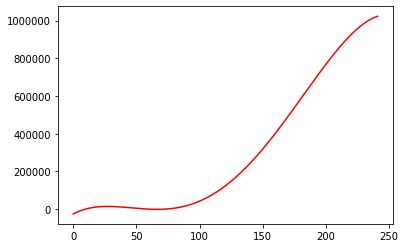

In [36]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
plt.plot(fun1(x), c='red')  
plt.show()

## Regresion lineal.

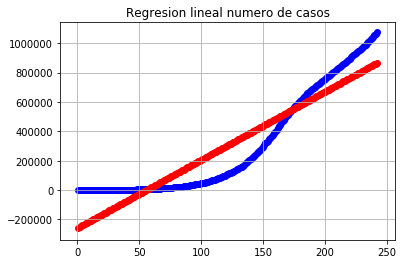

La ecuacion es la siguiente:  y = 4645.943122071123x -259643.52734817035


In [37]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import linear_model

modelo = linear_model.LinearRegression()
modelo.fit(x.reshape((-1,1)), y)  
y_pred = modelo.predict(x.reshape((-1,1)))


plt.scatter(x,y,color='blue') 
plt.title("Regresion lineal numero de casos")
plt.scatter(x,y_pred,color='red')  
plt.grid(True)
plt.show()   

if (modelo.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print("La ecuacion es la siguiente: ", ecua.format(modelo.coef_[0],modelo.intercept_)) 

## Regresion Polinomial

           4          3         2
-0.001964 x + 0.9034 x - 100.9 x + 3712 x - 2.922e+04


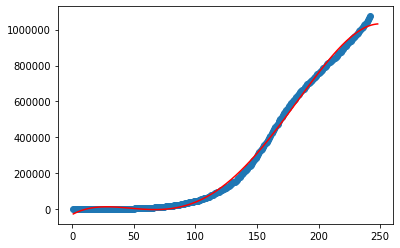

In [38]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y) 
x1=np.arange(1,len(ndf1)+7,1, dtype='float')
plt.plot(x1, fun1(x1), c='r')  
plt.show()

## Regresion Exponencial.

[0.040454   5.81575841]


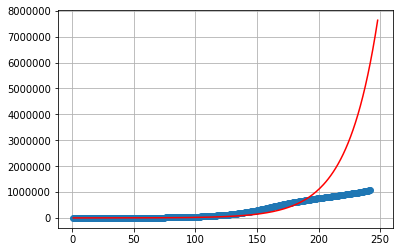

In [42]:
curve_fit=np.polyfit(x2, np.log(y), deg=1)
print(curve_fit)
pred_x=np.array(list(range(min(x2), max(x2)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x2,y2,'o')
plt.plot(pred_x,yx, color="red")
plt.grid(True)

## Regresion Logaritmica.

In [47]:
def modelo_logistico(x2,a,b):
    return a+b*np.log(x2)

exp_fit = curve_fit(modelo_logistico,x2,y2)

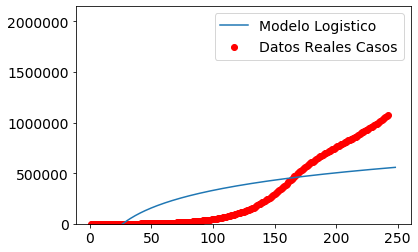

In [48]:
pred_x = list(range(min(x2),max(x2)+7))
plt.rc('font', size=14)
plt.scatter(x2,y2,label="Datos Reales Casos",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.ylim(0,max(y)*2)
plt.show()

## Regresion probabilistica.

In [49]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)

df = df.loc[:,['date','Colombia']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

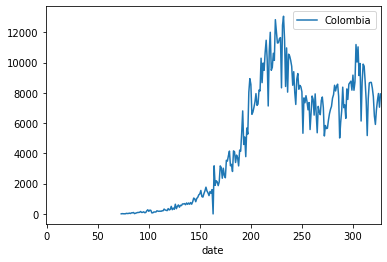

In [50]:
df.plot(x ='date', y='Colombia')

In [51]:
filtro = df["Colombia"][61:]
media = filtro.mean()
mediana = filtro.median()

In [52]:
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Colombia']]
y = list(df_t.iloc [:, 1])
x = list(df_t.iloc [:, 0])
prediccion_siguiente = int(y[-1] + mediana)

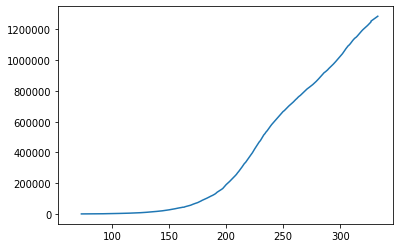

In [53]:
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

## Comparacion de modelo matematico con mdelo probabilistico.

### Modelo matematico.

           4          3         2
-0.001964 x + 0.9034 x - 100.9 x + 3712 x - 2.922e+04


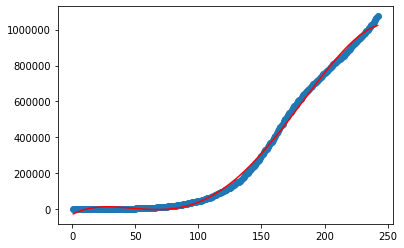

In [54]:
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp


df = pd.read_csv('covid.csv').fillna(0)
ndf= df.loc[(df[' Country'] == 'Colombia') & (df[' Cumulative_cases'] != 0)]
ndf1=ndf[['Date_reported',' Cumulative_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')

crx=x
cry=y

fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
y_pred=fun1(x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')  
plt.show()



### Modelo probabilistico.

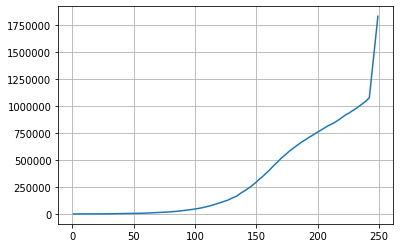

In [55]:
media = ndf1.values[:,1].mean()
mediana = np.median(ndf1.values[:,1])

for it in range(int(x[-1]), int(x[-1]+7)):
    x=np.append(x,(it+1))
    y=np.append(y,y[-1] + mediana)
plt.plot(x,y)
plt.grid(True)
plt.show()

### Comparacion de modelos.

In [56]:
y_pred=np.array([])
y_pred=fun1(x)

from tabulate import tabulate
table=[]
print(tabulate(table))
for i,j,k in zip(x,y,y_pred):
    table.append([i,j,round(k,2)])
print(tabulate(table, headers=["Dia","M.Probabilistico","M.Matematico"]))


  Dia    M.Probabilistico      M.Matematico
-----  ------------------  ----------------
    1         5            -25607.2
    2         5            -22191.3
    3         5            -18966.6
    4         5            -15927.8
    5         7            -13069.5
    6         7            -10386.7
    7        13             -7874.03
    8        20             -5526.51
    9        28             -3339.04
   10        28             -1306.6
   11        38               575.77
   12        49              2313.02
   13        97              3910.01
   14       108              5371.58
   15       145              6702.51
   16       196              7907.53
   17       196              8991.34
   18       196              9958.58
   19       306             10813.9
   20       306             11561.7
   21       470             12206.6
   22       470             12753
   23       491             13205.4
   24       539             13568
   25       608             13845.3
   2

### Mejor prediccion.

El modelo matematico tuvo mejor resultado de prediccion ya que se da un dato mas real de lo que podria suceder a futuro.

### Ventajas y desventajas.

Ventajas M. probabilistico:
* Calculo rápido de medidas y varianzas.
* El muestreo probabilístico es sencillo y de fácil comprensión.

Desventajas M. probabilistico.
* Existe un margen de error.
* Si trabajamos con muestras pequeñas es posible que no se represente correctamente a toda la población adecuadamente, es por esto que se debe manejar un muestreo completo.

Ventajas M. matematico:
* Se adecua a una prediccion de una situación real.
* Permiten una identificación rápida de las expectativas esperadas

Desventajas M. matematico.
* Se pierde información del fenómeno que se esta estudiando.
* La recolección de datos puede ser muy costosa y complicada.